# LW paper's figures

The figures to be used in the longwave paper are generated in this notebook.  Matplotlib is used in place of Bokeh, as it's easier to output to pdf, and interactive plots aren't really needed for this.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pymongo
import matplotlib 
import matplotlib.pyplot as plt                                                                        
                                                                
from climatools.atm import *
from climatools.parameters import *
from climatools.dataset import *
from climatools.pymongo import *

import climatools.plot.plot as climaviz

from IPython import display                                                                                          
                                                                                                                     

In [3]:
client = pymongo.MongoClient('localhost', 27017)

In [4]:
COMMITNUMBER = '1013f91'

In [5]:
ATMPRO = dict(mls=294, saw=257, trp=300)

# Figure 1

In [7]:
atmpro = 'mls'

In [13]:
atmcomp1 = AtmComposition.cliradlw_nongreys(onlygas='h2o', onlyband=1)
parms_lbl1 = atmcomp1.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
datas_lbl1 = [p.modeldata_pymongo(collection=client.lblnew.bestfit_lw) for p in parms_lbl1]
d1 = datas_lbl1[0]
cool_lbl1 = d1.crd_cool.sum('g')['coolrg']
cool_wgt1 = d1.wgt_cool.sum('g').sel(igg=10)['coolrg']
cool_lbl1 = cool_lbl1[cool_lbl1.pressure > 1e-2]
cool_wgt1 = cool_wgt1[cool_wgt1.pressure > 1e-2]

atmcomp7 = AtmComposition.cliradlw_nongreys(onlygas='h2o', onlyband=7)
parms_lbl7 = atmcomp7.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
datas_lbl7 = [p.modeldata_pymongo(collection=client.lblnew.bestfit_lw) for p in parms_lbl7]
d7 = datas_lbl7[0]
cool_lbl7 = d7.crd_cool.sum('g')['coolrg']
cool_wgt7 = d7.wgt_cool.sum('g').sel(igg=10)['coolrg']
cool_lbl7 = cool_lbl7[cool_lbl7.pressure > 1e-2]
cool_wgt7 = cool_wgt7[cool_wgt7.pressure > 1e-2]

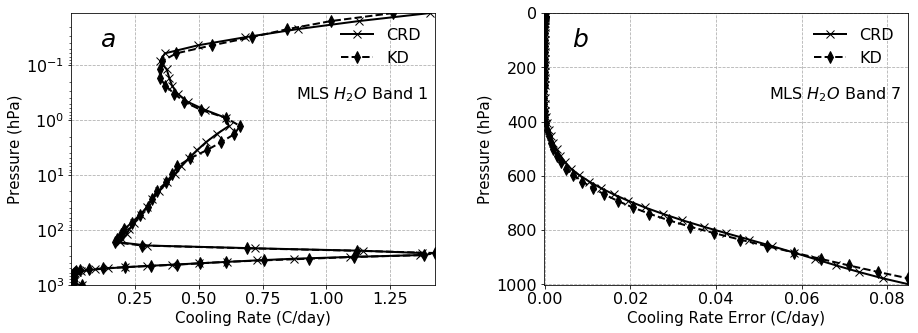

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

cool_lbl1.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                        yincrease=False, yscale='log',
                        color='black', linestyle='-', linewidth=2, marker='x', markersize=8, alpha=1,
                        label='CRD')

cool_wgt1.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                        yincrease=False, yscale='log',
                        color='black', linestyle='--', linewidth=2, marker='d', markersize=8, alpha=1,
                        label='KD')

axs[0].grid(b=True, linestyle='--')
axs[0].set_title(None)
axs[0].set_ylabel('Pressure (hPa)', fontsize=15)
axs[0].set_xlabel('Cooling Rate (C/day)', fontsize=15)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].tick_params(labelsize=16)
axs[0].text(x=.1, y=.9, s='$a$', fontsize=25,
           verticalalignment='center', horizontalalignment='center', transform=axs[0].transAxes)
axs[0].text(x=.8, y=.7, s="MLS $H_2O$ Band 1", fontsize=16,
            verticalalignment='center', horizontalalignment='center', transform=axs[0].transAxes)
axs[0].legend(loc='upper right', frameon=False, fontsize=16)


cool_lbl7.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=2, marker='x', markersize=8, alpha=1,
                       label='CRD')

cool_wgt7.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='linear',
                       color='black', linestyle='--', linewidth=2, marker='d', markersize=8, alpha=1,
                       label='KD')

axs[1].grid(b=True, linestyle='--')
axs[1].set_title(None)
axs[1].set_ylabel('Pressure (hPa)', fontsize=15)
axs[1].get_yaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlabel('Cooling Rate Error (C/day)', fontsize=15)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].tick_params(labelsize=16)
axs[1].text(x=.1, y=.9, s='$b$', fontsize=25,
            verticalalignment='center', horizontalalignment='center', transform=axs[1].transAxes)
axs[1].text(x=.8, y=.7, s='MLS $H_2O$ Band 7', fontsize=16,
            verticalalignment='center', horizontalalignment='center', transform=axs[1].transAxes)
axs[1].legend(loc='upper right', frameon=False, fontsize=16)

plt.subplots_adjust(wspace=.3)

fig.savefig('LWpaper_figure01.pdf')

# Figures 2, 3, 4, 5, 6

## Figure 3

In [375]:
atmpro = 'mls'

In [395]:
atmcomp = AtmComposition.cliradlw_nongreys(onlygas='co2')

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collec = client.lblnew.bestfit_lw
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm in parms_lbl]
data_lbl = sum(datas_lbl)

In [410]:
cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > .8e-2]
cool_cli = cool_cli[cool_cli.pressure > .8e-2]

cool_dif = cool_cli - cool_crd

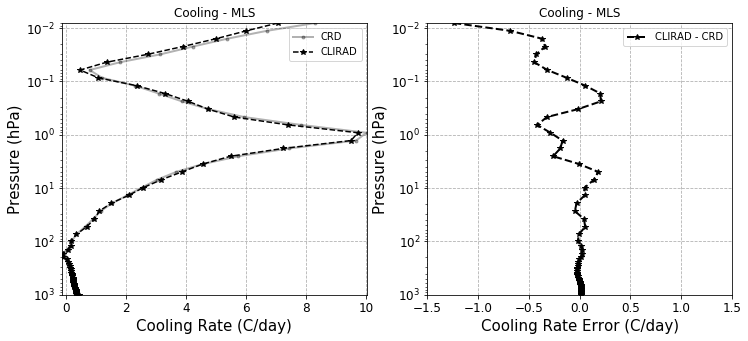

In [416]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

cool_crd.climaviz.plot(ax=axs[0], 
                       index_on_yaxis=True, 
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='-', marker='.',
                       linewidth=2, alpha=.3,
                       label='CRD')

cool_cli.climaviz.plot(ax=axs[0],
                       index_on_yaxis=True,
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='--', marker='*',
                       label='CLIRAD')

axs[0].grid(b=True, linestyle='--')
axs[0].set_title('Cooling - MLS')
axs[0].set_ylabel('Pressure (hPa)', fontsize=15)
axs[0].set_xlabel('Cooling Rate (C/day)', fontsize=15)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].tick_params(labelsize='large')


cool_dif.climaviz.plot(ax=axs[1],
                       index_on_yaxis=True,
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='--', marker='*',
                       linewidth=2, alpha=1,
                       label='CLIRAD - CRD')

axs[1].grid(b=True, linestyle='--')
axs[1].set_title('Cooling - MLS')
axs[1].set_ylabel('Pressure (hPa)', fontsize=15)
axs[1].set_xlabel('Cooling Rate Error (C/day)', fontsize=15)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(-1.5, 1.5)
axs[1].tick_params(labelsize='large')



fig.savefig('LWpaper_figure03.pdf')

# Figures 7, 8 and 9

In [188]:
atmpro = 'mls'

In [189]:
atmcomp = AtmComposition.cliradlw_nongreys()

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(nv=1000, dv=0.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collecs = [client.lblnew.bestfit_lw if parm.model_name == 'lblnew-bestfit' else 
           client.lblnew.overlap_lw for parm in parms_lbl]
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm, collec in zip(parms_lbl, collecs)]
data_lbl = sum(datas_lbl)

In [371]:
cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > .8e-2]
cool_cli = cool_cli[cool_cli.pressure > .8e-2]

cool_dif = cool_cli - cool_crd

#cool_crd.loc[cool_crd.pressure < .5] = np.nan
#cool_cli.loc[cool_cli.pressure < .5] = np.nan

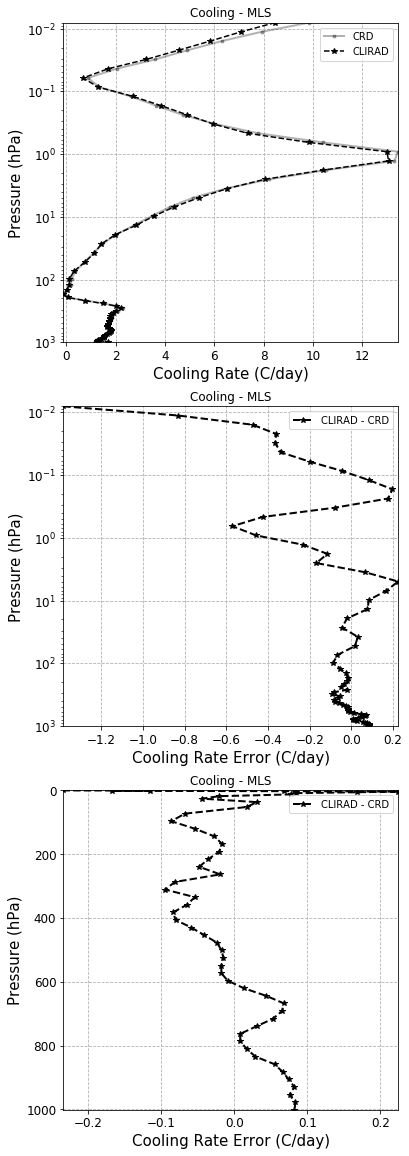

In [372]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 20))

cool_crd.climaviz.plot(ax=axs[0], 
                       index_on_yaxis=True, 
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='-', marker='.',
                       linewidth=2, alpha=.3,
                       label='CRD')

cool_cli.climaviz.plot(ax=axs[0],
                       index_on_yaxis=True,
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='--', marker='*',
                       label='CLIRAD')

axs[0].grid(b=True, linestyle='--')
axs[0].set_title('Cooling - MLS')
axs[0].set_ylabel('Pressure (hPa)', fontsize=15)
axs[0].set_xlabel('Cooling Rate (C/day)', fontsize=15)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].tick_params(labelsize='large')


cool_dif.climaviz.plot(ax=axs[1],
                       index_on_yaxis=True,
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='--', marker='*',
                       linewidth=2, alpha=1,
                       label='CLIRAD - CRD')

axs[1].grid(b=True, linestyle='--')
axs[1].set_title('Cooling - MLS')
axs[1].set_ylabel('Pressure (hPa)', fontsize=15)
axs[1].set_xlabel('Cooling Rate Error (C/day)', fontsize=15)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].tick_params(labelsize='large')

cool_dif.loc[cool_dif.pressure < .5e0] = np.nan
cool_dif.climaviz.plot(ax=axs[2],
                       index_on_yaxis=True,
                       yincrease=False,
                       yscale='linear',
                       varlim_from_indexrange=(1, 1e3),
                       color='black', linestyle='--', marker='*',
                       linewidth=2, alpha=1,
                       label='CLIRAD - CRD')

axs[2].grid(b=True, linestyle='--')
axs[2].set_title('Cooling - MLS')
axs[2].set_ylabel('Pressure (hPa)', fontsize=15)
axs[2].set_xlabel('Cooling Rate Error (C/day)', fontsize=15)
axs[2].get_yaxis().get_major_formatter().set_scientific(False)
axs[2].get_xaxis().get_major_formatter().set_scientific(False)
axs[2].tick_params(labelsize='large')

fig.savefig('LWpaper_figure08.pdf')

# --

In [38]:
display.HTML('''<script>                                                                                             
code_show=true;                                                                                                      
function code_toggle() {                                                                                             
 if (code_show){                                                                                                     
 $('div.input').hide();                                                                                              
 } else {                                                                                                            
 $('div.input').show();                                                                                              
 }                                                                                                                   
 code_show = !code_show                                                                                              
}                                                                                                                    
$( document ).ready(code_toggle);                                                                                    
</script>                                                                                                            
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></for\
m>''')